In [1]:
import prologue
import matplotlib.pyplot as plt
from torch import nn
from helper import *
%matplotlib inline

torch.Size([1, 2, 14, 14])


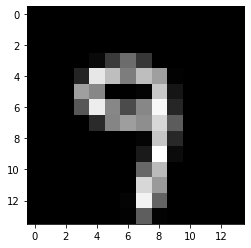

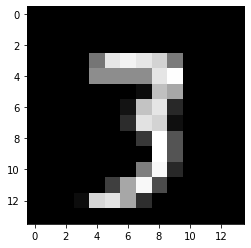

tensor([9, 3])


In [2]:
#just plotting a pair of digits
train_img, train_target, train_classes, test_img, test_target, test_classes = prologue.generate_pair_sets(1)
# plot the first training sample pair
print(train_img.shape)
fig = plt.figure
plt.imshow(train_img[0, 0], cmap='gray')
plt.show() 
plt.imshow(train_img[0, 1], cmap='gray')
plt.show() 
print(train_classes[0])

# Siamese Network

In [3]:
#We now train and evaluate the Siamese Network
from SiameseNet import *


#generate the training and test data:
train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(1000)

#center the training, and testing data:
mu, std = train_input.mean(), train_input.std()
train_input.sub_(mu).div_(std)

mu, std = test_input.mean(), test_input.std()
test_input.sub_(mu).div_(std)



0 3.54768642783165
10 1.63289625197649
20 0.7268567895516753


In [4]:
#Initialize and Train the Siamese Network
Net = SiameseNet()

print('Printing the losses every 10 epochs:')
Net.train_model(train_input, 
                big_transform_to_one_hot(train_classes), 
                mini_batch_size=25, nb_epochs=25,
               criterion=nn.MSELoss())

Printing the losses every 10 epochs
0 3.5786923691630363
10 1.5978130865842104
20 0.6064665578305721


In [6]:
#Evaluate the Network:
print("Train error:", Net.compute_nb_errors(train_input, big_transform_to_one_hot(train_classes), 20)/10)
#first_model(first_input[0:1])
print("Test error:", Net.compute_nb_errors(test_input, big_transform_to_one_hot(test_classes), 20)/10)



Train error: 9.2
Test error: 17.3
